In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import nfode
import torch.jit
device = torch.device('cpu')
import random
from datetime import datetime

# Main program
if __name__ == "__main__":
    # Load data
    data = np.load('data_set.npz')
    t_data = data['t_data']
    x_data = data['x_data']


    # Convert to PyTorch Tensor
    device = torch.device('cpu')  # or 'cuda' if you have a GPU
    x_data = torch.tensor(x_data, dtype=torch.float32).requires_grad_(True).to(device)
    t_data = torch.tensor(t_data, dtype=torch.float32).requires_grad_(True).to(device)

In [2]:
model = nfode.define_model()
nfode.initialize_params_uniform(model)
milestones = [100]
gamma = 0.1
lr = 0.01
num_epochs = 200
k = 1

In [3]:
model, x_preds, loss_curve, real_loss_curve = nfode.train(model, t_data, x_data, num_epochs = 200, k=1, lr=0.01, milestones=[800], gamma=0.1)

1 10 / 200 22:32:41 cpu real loss: 2.6728456 derivate loss: 1.9632004
1 20 / 200 22:32:54 cpu real loss: 1.8305715 derivate loss: 1.7514606
1 30 / 200 22:33:07 cpu real loss: 1.504046 derivate loss: 0.9240198
1 40 / 200 22:33:21 cpu real loss: 1.5347166 derivate loss: 1.3291006
1 50 / 200 22:33:34 cpu real loss: 1.8718092 derivate loss: 1.5525596
1 60 / 200 22:33:47 cpu real loss: 1.9354985 derivate loss: 1.5836813
1 70 / 200 22:34:01 cpu real loss: 2.3550158 derivate loss: 1.8333772
1 80 / 200 22:34:14 cpu real loss: 2.427866 derivate loss: 1.9298981
1 90 / 200 22:34:27 cpu real loss: 1.9670607 derivate loss: 1.5168728
1 100 / 200 22:34:40 cpu real loss: 0.83397424 derivate loss: 0.49574697
1 110 / 200 22:34:53 cpu real loss: 1.5423158 derivate loss: 1.0556922
1 120 / 200 22:35:07 cpu real loss: 2.4621856 derivate loss: 1.1562403
1 130 / 200 22:35:21 cpu real loss: 1.6220256 derivate loss: 1.424408
1 140 / 200 22:35:34 cpu real loss: 0.7315521 derivate loss: 0.7064851
1 150 / 200 22:3

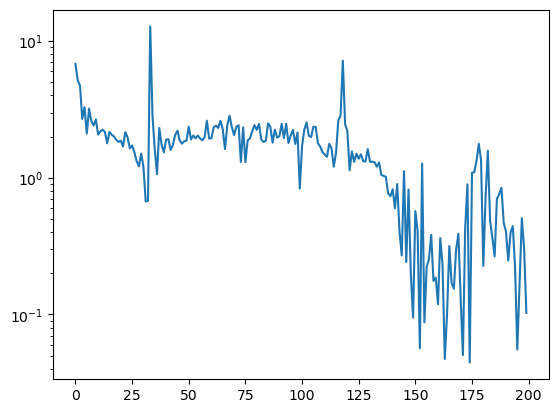

In [4]:
plt.plot(real_loss_curve)
plt.yscale('log')

C:\Users\21138\Desktop\快速访问\NFODE\nfode.py:94: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x0 = torch.tensor(x0, dtype=torch.float32).requires_grad_(True)
C:\Users\21138\Desktop\快速访问\NFODE\nfode.py:95: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t_data = torch.tensor(t_data, dtype=torch.float32).unsqueeze(1).requires_grad_(True)


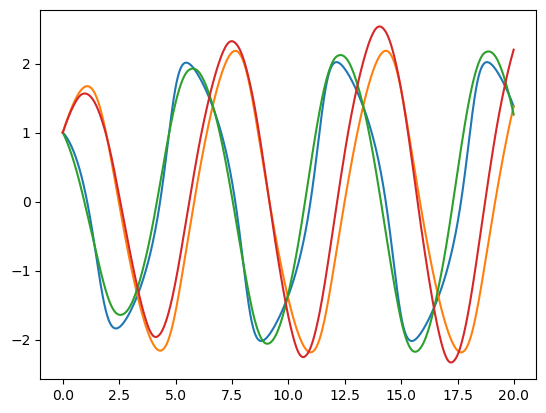

In [5]:
data = np.load('data_test.npz')
t_data_test = data['t_data']
x_data_test = data['x_data']
x_data_test = torch.tensor(x_data_test, dtype=torch.float32).to(device)
t_data_test = torch.tensor(t_data_test, dtype=torch.float32).unsqueeze(1).to(device)
x0 = x_data_test[:,0]
x_preds_test = nfode.predict(model, t_data_test, x0)
t_data_test = t_data_test.detach().numpy()
x_data_test = x_data_test.detach().numpy()
plt.plot(t_data_test, x_data_test.T)
plt.plot(t_data_test, x_preds_test)